# Complete Data

In [2]:
# Loading in required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# This makes plots appear in the notebook
%matplotlib inline

## Data Cleaning  

In [3]:
df = pd.read_csv('thesis_combined_final.csv')

# dropping first 2 rows
df = df.drop(df.index[ :2])

# dropping questions 19 and 23 with many NAN
df = df.drop(['19', '23'], axis=1)

# re-labeling questions
df = df.rename(columns ={    
    '24':'Age',
    '25':'Position',
    '26':'Politics',
    '18':'Activities',
    '20': 'Arab_num',
    '21':'Lunch',
    '22':'Lunch_mates',
    '27':'Demo',
    '28': 'Jewish Pride',
    '29': 'Arab Pride'
})

# Re-labeling 'Politics' column
df.columns.values[-4] = 'Politics'

# Consolidating Demo column to Jewish or Arab
replacements = {'5,6': 'Jewish', 
                '5':'Jewish',
                '6': 'Jewish', 
                '1,2,4,7': 'Arab', 
                '1,3,4,7': 'Arab', 
                '1': 'Arab', 
                '2,7': 'Arab',
                '1,2,3,4,5,6,7': np.nan,
                '5,6': 'Jewish', 
                '5':'Jewish',
                '6': 'Jewish', 
                '1,2,4,7': 'Arab', 
                '1,3,4,7': 'Arab', 
                '1': 'Arab', 
                '2,7': 'Arab',
                '1,2,3,4,5,6,7': np.nan,
                '1,3,7': 'Arab', 
                '1,2,4': 'Arab', 
                'nan': 'NaN', 
                '3,7': 'Arab', 
                '1,3,4': 'Arab', 
                '1,5,7': 'Arab',
                '1,3,4,5,7': 'Arab', 
                '1,2,4,5,7': 'Arab',
                'ישראל':'Jewish',
                'ישראלי':'Jewish',
                'יהודי':'Jewish',
                'ישראלי,יהודי':'Jewish',
                'ערבי,מוסלמי,פלסטיני,ערבי ישראלי':'Arab',
                'ערבי,נוצרי,ערבי ישראלי':'Arab',
                'ערבי,מוסלמי,פלסטיני':'Arab',
                'ערבי,נוצרי,פלסטיני,ישראלי,ערבי ישראלי':'Arab',
                'נוצרי,ערבי ישראלי':'Arab',
                'ערבי,נוצרי,פלסטיני':'Arab',
                'ערבי,ישראלי,ערבי ישראלי':'Arab',
                'ערבי,מוסלמי,פלסטיני,ישראלי,ערבי ישראלי':'Arab',
                'ערבי':'Arab',
                'Israeli':'Jewish', 
                'Arab,Muslim,Palestinian':'Arab',
                'Arab':'Arab',
                'Muslim,Arab Israeli':'Arab',
                'Arab,Muslim,Christian,Palestinian,Israeli,Jewish,Arab Israeli':'Arab',
                'Arab,Muslim,Palestinian,Arab Israeli':'Arab',
                'Jewish':'Jewish',
                'Israeli,Jewish': 'Jewish'
}

df['Demo'] = df['Demo'].replace(replacements)

# Q22 How many Arab Israelis work at your current company? (change column to 1,2,3,4)

df['Arab_num'] = df['Arab_num'].replace('מעל 30', 'Over 30') # Changing hebrew string in Arab_num to a float

replacements2 = {'0-5':'1',
                 '5-10':'2',
                 '10-30':'3',
                 'Over 30':'4',
                 '05-Oct': np.nan,
                 'Oct-30': np.nan,
                }

df['Arab_num'] = df['Arab_num'].replace(replacements2)

### Changing columns to numeric values

In [4]:
# Columns with only numeric values
columns_numeric = ['2', '3', '4','5', '6','7', '8', '9', '10', 
                   '11', '12', '13', '14', '15', '16', '17', 
                   'Arab_num']
df[columns_numeric] = df[columns_numeric].astype(float)

# Column 1
df['1'] = df['1'].replace("Completely agree\n", "", regex=True)
df['1'] = df['1'].astype(float)
                   
# Column Politics
replacements3 = {'1\n':'1',
                 'מרכז\n4':'4',
                 'ימין מתון\n3':'3', 
                 'שמאל מתון\n4':'4', 
                 'ימין\n2':'2', 
                 'שמאל\n6':'6',
                 'שמאל קיצוני\n7':'7'
}

df['Politics'] = df['Politics'].replace(replacements3)
df['Politics'] = df['Politics'].astype(float)

# Age
df['Age'] = df['Age'].astype(float)

# Pride
df['Jewish Pride'] = df['Jewish Pride'].replace('מסכים/מה לחלוטין\n6', '6')
df['Jewish Pride'] = df['Jewish Pride'].astype(float)

df['Arab Pride'] = df['Arab Pride'].replace('מסכים/מה לחלוטין\n6', '6')
df['Arab Pride'] = df['Arab Pride'].replace('לא מסכים/מה בכלל\n1', '1')
df['Arab Pride'] = df['Arab Pride'].astype(float)

# Checking work
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 2 to 269
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   UserLanguage  268 non-null    object 
 1   1             202 non-null    float64
 2   2             202 non-null    float64
 3   3             198 non-null    float64
 4   4             202 non-null    float64
 5   5             202 non-null    float64
 6   6             202 non-null    float64
 7   7             202 non-null    float64
 8   8             202 non-null    float64
 9   9             202 non-null    float64
 10  10            202 non-null    float64
 11  11            202 non-null    float64
 12  12            202 non-null    float64
 13  13            202 non-null    float64
 14  14            202 non-null    float64
 15  15            200 non-null    float64
 16  16            202 non-null    float64
 17  17            202 non-null    float64
 18  Activities    202 non-null    

## Exploratory Analysis

In [5]:
# How many of each demo do we have? 
display(df['Demo'].value_counts())

# Bucketing questions into groups

Work_Attitude_and_Motivation = ['1', '2', '3', '4']
Work_Relationships = ['5', '6']
Self_Identity_and_Perception = ['7', '9']
Inter_group_Relationships = ['11', '12', '13', '14']
Equality_and_Fairness = ['15','17']
Inverse_Answers = ['8', '10', '16']

# creating dataframe without Arab subjects
df2 = df[df.Demo == 'Jewish']  

Jewish    170
Arab       28
Name: Demo, dtype: int64

### Creating New Datasets

In [6]:
# exploring new dataset
df2.shape

# separating by English and Hebrew Surveyers
english = df2[df2.UserLanguage == 'EN']
hebrew = df2[df2.UserLanguage == 'HE']

# exploring new datasets
print(english.shape)
print(hebrew.shape)

(80, 28)
(90, 28)


### Comparing means

In [7]:
from scipy.stats import ttest_ind

results = []

for column in range(1, 18):
    english_mean = english[str(column)].mean()
    hebrew_mean = hebrew[str(column)].mean()
    
    demo1_values = english[str(column)].dropna()
    demo2_values = hebrew[str(column)].dropna()
    
    t_statistic, p_value = ttest_ind(demo1_values, demo2_values, nan_policy='omit')
    
    if p_value < 0.05:
        significance = "Significant"
    else:
        significance = "Not Significant"
    
    results.append({'Column': str(column), 'Mean Difference': english_mean - hebrew_mean, 'Significance': significance})

results_df = pd.DataFrame(results)
results_df

,Column,Mean Difference,Significance
0,1,-0.011111,Not Significant
1,2,0.119444,Not Significant
2,3,-0.075214,Not Significant
3,4,-0.116667,Not Significant
4,5,-0.088889,Not Significant
5,6,-0.005556,Not Significant
6,7,-0.122222,Not Significant
7,8,-0.047222,Not Significant
8,9,-0.013889,Not Significant
9,10,-0.263889,Not Significant


In [8]:
# comparing means by question group
from scipy.stats import ttest_ind

groups = {
    'Work_Attitude_and_Motivation': ['1', '2', '3', '4'],
    'Work_Relationships': ['5', '6'],
    'Self_Identity_and_Perception': ['7', '9'],
    'Inter_group_Relationships': ['11', '12', '13', '14'],
    'Equality_and_Fairness': ['15', '17'],
    'Inverse_Answers': ['8', '10', '16']
}

results = []

for group, columns in groups.items():
    english_group_mean = english[columns].mean().mean()
    hebrew_group_mean = hebrew[columns].mean().mean()
    
    demo1_values = english[columns].stack().dropna()
    demo2_values = hebrew[columns].stack().dropna()
    
    t_statistic, p_value = ttest_ind(demo1_values, demo2_values, nan_policy='omit')
    
    if p_value < 0.05:
        significance = "Significant"
    else:
        significance = "Not Significant"
    
    results.append({'Group': group, 'Mean Difference': english_group_mean - hebrew_group_mean, 'Significance': significance})

results_group = pd.DataFrame(results)
results_group

,Group,Mean Difference,Significance
0,Work_Attitude_and_Motivation,-0.020887,Not Significant
1,Work_Relationships,-0.047222,Not Significant
2,Self_Identity_and_Perception,-0.068056,Not Significant
3,Inter_group_Relationships,0.058333,Not Significant
4,Equality_and_Fairness,-0.046717,Not Significant
5,Inverse_Answers,0.023148,Not Significant


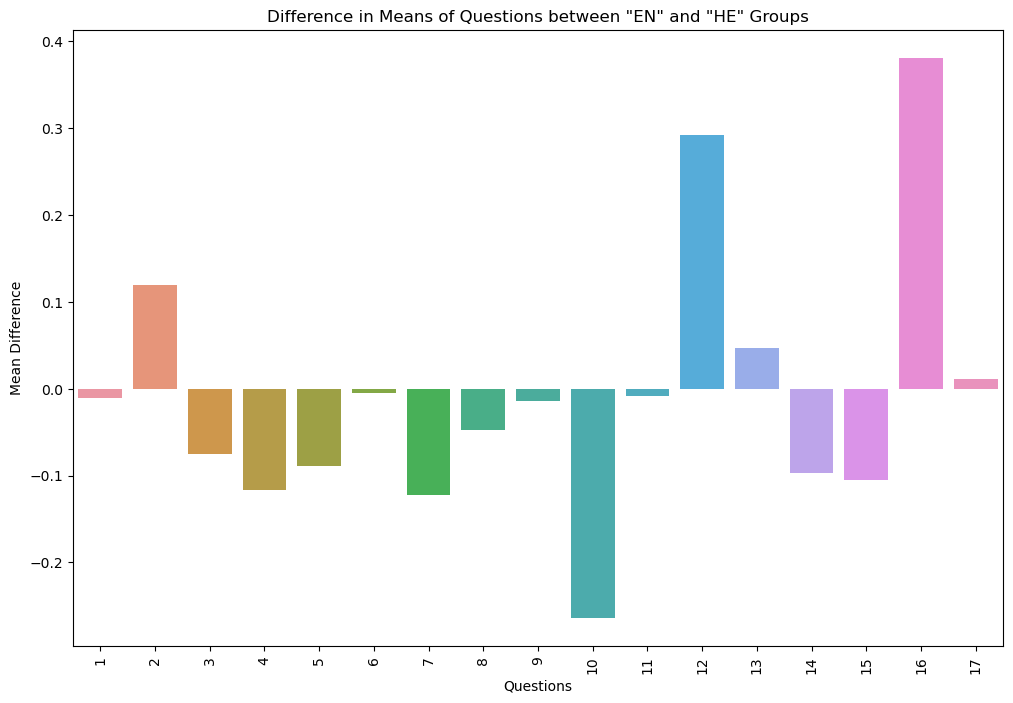

In [9]:
# graphical representation
import matplotlib.pyplot as plt
import seaborn as sns

# Select columns labeled 1 to 17
question_columns = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17']

# Filter the dataframe for "EN" and "HE" groups
en_group = df2[df2['UserLanguage'] == "EN"]
he_group = df2[df2['UserLanguage'] == "HE"]

# Calculate the mean difference for each question
mean_diff = en_group[question_columns].mean() - he_group[question_columns].mean()

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=mean_diff.index, y=mean_diff.values)
plt.xticks(rotation=90)
plt.title('Difference in Means of Questions between "EN" and "HE" Groups')
plt.xlabel('Questions')
plt.ylabel('Mean Difference')
plt.show()

In [10]:
# let's try using the Median
from scipy.stats import ttest_ind

results = []

for column in range(1, 18):
    english_median = english[str(column)].median()
    hebrew_median = hebrew[str(column)].median()
    
    demo1_values = english[str(column)].dropna()
    demo2_values = hebrew[str(column)].dropna()
    
    t_statistic, p_value = ttest_ind(demo1_values, demo2_values, nan_policy='omit')
    
    if p_value < 0.05:
        significance = "Significant"
    else:
        significance = "Not Significant"
    
    results.append({'Column': str(column), 'Median Difference': english_median - hebrew_median, 'Significance': significance})

results_df = pd.DataFrame(results)
results_df

,Column,Median Difference,Significance
0,1,0.0,Not Significant
1,2,1.0,Not Significant
2,3,0.0,Not Significant
3,4,0.0,Not Significant
4,5,0.0,Not Significant
5,6,0.0,Not Significant
6,7,0.5,Not Significant
7,8,0.0,Not Significant
8,9,0.0,Not Significant
9,10,-1.0,Not Significant


In [11]:
# let's try using the Median for groups
from scipy.stats import ttest_ind

groups = {
    'Work_Attitude_and_Motivation': ['1', '2', '3', '4'],
    'Work_Relationships': ['5', '6'],
    'Self_Identity_and_Perception': ['7', '9'],
    'Inter_group_Relationships': ['11', '12', '13', '14'],
    'Equality_and_Fairness': ['15', '17'],
    'Inverse_Answers': ['8', '10', '16']
}

results = []

for group, columns in groups.items():
    english_group_median = english[columns].median().median()
    hebrew_group_median = hebrew[columns].median().median()
    
    demo1_values = english[columns].stack().dropna()
    demo2_values = hebrew[columns].stack().dropna()
    
    t_statistic, p_value = ttest_ind(demo1_values, demo2_values, nan_policy='omit')
    
    if p_value < 0.05:
        significance = "Significant"
    else:
        significance = "Not Significant"
    
    results.append({'Group': group, 'Median Difference': english_group_median - hebrew_group_median, 'Significance': significance})

results_group = pd.DataFrame(results)
results_group

,Group,Median Difference,Significance
0,Work_Attitude_and_Motivation,0.50,Not Significant
1,Work_Relationships,0.00,Not Significant
2,Self_Identity_and_Perception,0.25,Not Significant
3,Inter_group_Relationships,0.00,Not Significant
4,Equality_and_Fairness,0.00,Not Significant
5,Inverse_Answers,1.00,Not Significant


## Correlations

### Heat Maps

In [12]:
corr_matrix = df_groups.corr()

NameError: name 'df_groups' is not defined

In [ ]:
# Creating data frame with groups
df_groups_en = pd.DataFrame({
    'Work_Attitude_and_Motivation': english[Work_Attitude_and_Motivation].mean(axis=1),
    'Work_Relationships': english[Work_Relationships].mean(axis=1),
    'Self_Identity_and_Perception': english[Self_Identity_and_Perception].mean(axis=1),
    'Inter_group_Relationships': english[Inter_group_Relationships].mean(axis=1),
    'Equality_and_Fairness': english[Equality_and_Fairness].mean(axis=1),
    'Inverse_Answers': english[Inverse_Answers].mean(axis=1)
})

# Calculate the correlation matrix for the groups
corr_matrix_en = df_groups_en.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_en, annot=True, cmap='coolwarm')
plt.title('Correlation between Survey Question Groups')
plt.show()

### Comparing Means Between Groups

In [ ]:
# Creating new data frame with group means added
df1 = df.copy()
df1['Work_Attitude_and_Motivation'] = df1[Work_Attitude_and_Motivation].mean(axis=1)
df1['Work_Relationships'] = df1[Work_Relationships].mean(axis=1)
df1['Self_Identity_and_Perception'] = df1[Self_Identity_and_Perception].mean(axis=1)
df1['Inter_group_Relationships'] = df1[Inter_group_Relationships].mean(axis=1)
df1['Equality_and_Fairness'] = df1[Equality_and_Fairness].mean(axis=1)
df1['Inverse_Answers'] = df1[Inverse_Answers].mean(axis=1)

In [ ]:
grouped_means = df1.groupby('Demo').mean().reset_index()
display(grouped_means)

### Testing for Significance Between Means

In [ ]:
from scipy.stats import ttest_ind

groups = {
    'Work_Attitude_and_Motivation': Work_Attitude_and_Motivation,
    'Work_Relationships': Work_Relationships,
    'Self_Identity_and_Perception': Self_Identity_and_Perception,
    'Inter_group_Relationships': Inter_group_Relationships,
    'Equality_and_Fairness': Equality_and_Fairness,
}

demo1 = 'Jewish'
demo2 = 'Arab'

for group_name, group_columns in groups.items():
    demo1_values = df.loc[df['Demo'] == demo1, group_columns]
    demo2_values = df.loc[df['Demo'] == demo2, group_columns]
    
    t_statistic, p_value = ttest_ind(demo1_values, demo2_values, nan_policy='omit')
    
    if (p_value < 0.05).any():
        print(f"The difference in means between {demo1} and {demo2} in the {group_name} group is significant.")
    else:
        print(f"The difference in means between {demo1} and {demo2} in the {group_name} group is not significant.")

### Data Visualization of Significant Groups

In [ ]:
# Visualizing differences in Work Attitude and Motivation by Demo
df_1 = df.groupby('Demo')[Work_Attitude_and_Motivation].mean().reset_index()
df_1 = pd.melt(df_1, id_vars='Demo', var_name='Question', value_name='Mean')

sns.catplot(x='Question', y='Mean', hue='Demo', kind='bar', data=df_1, ci=None)

plt.title('Difference In Means: Work Attitude')
plt.xlabel('Question')
plt.ylabel('Mean')
plt.xticks(rotation=90) # Rotate x-axis labels for better visibility
plt.show()

In [ ]:
# Visualizing differences in Work_Relationships by Demo
df_1 = df.groupby('Demo')[Work_Relationships].mean().reset_index()
df_1 = pd.melt(df_1, id_vars='Demo', var_name='Question', value_name='Mean')

sns.catplot(x='Question', y='Mean', hue='Demo', kind='bar', data=df_1, ci=None)

plt.title('Difference In Means: Work_Relationships')
plt.xlabel('Question')
plt.ylabel('Mean')
plt.xticks(rotation=90) # Rotate x-axis labels for better visibility
plt.show()

In [ ]:
# Visualizing differences in Self_Identity_and_Perception by Demo
df_1 = df.groupby('Demo')[Self_Identity_and_Perception].mean().reset_index()
df_1 = pd.melt(df_1, id_vars='Demo', var_name='Question', value_name='Mean')

sns.catplot(x='Question', y='Mean', hue='Demo', kind='bar', data=df_1, ci=None)

plt.title('Difference In Means: Self_Identity_and_Perception')
plt.xlabel('Question')
plt.ylabel('Mean')
plt.xticks(rotation=90) # Rotate x-axis labels for better visibility
plt.show()

In [ ]:
# Visualizing differences in Inter_group_Relationships by Demo
df_1 = df.groupby('Demo')[Inter_group_Relationships].mean().reset_index()
df_1 = pd.melt(df_1, id_vars='Demo', var_name='Question', value_name='Mean')

sns.catplot(x='Question', y='Mean', hue='Demo', kind='bar', data=df_1, ci=None)

plt.title('Difference In Means: Inter_group_Relationships')
plt.xlabel('Question')
plt.ylabel('Mean')
plt.xticks(rotation=90) # Rotate x-axis labels for better visibility
plt.show()

In [ ]:
# Visualizing differences in Equality_and_Fairness by Demo
df_1 = df.groupby('Demo')[Equality_and_Fairness].mean().reset_index()
df_1 = pd.melt(df_1, id_vars='Demo', var_name='Question', value_name='Mean')

sns.catplot(x='Question', y='Mean', hue='Demo', kind='bar', data=df_1, ci=None)

plt.title('Difference In Means: Equality_and_Fairness')
plt.xlabel('Question')
plt.ylabel('Mean')
plt.xticks(rotation=90) # Rotate x-axis labels for better visibility
plt.show()

In [14]:
df.head(20)

,UserLanguage,1,2,3,4,5,6,7,8,9,...,Activities,Arab_num,Lunch,Lunch_mates,Age,Position,Politics,Demo,Jewish Pride,Arab Pride
2,EN,4.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,...,4,1.0,1,NaN,38.0,׳׳—׳׳§,4.0,Jewish,5.0,NaN
3,EN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,EN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,EN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,EN,6.0,6.0,6.0,5.0,4.0,6.0,6.0,3.0,6.0,...,1,2.0,2,2,29.0,NaN,2.0,Jewish,6.0,NaN
7,EN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,EN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,EN,4.0,5.0,3.0,5.0,5.0,3.0,5.0,1.0,5.0,...,5,2.0,2,2,64.0,System analyst project manager,4.0,Jewish,3.0,NaN
10,EN,4.0,4.0,4.0,3.0,4.0,2.0,5.0,3.0,2.0,...,1,1.0,2,2,43.0,Research engineer,5.0,Jewish,4.0,NaN
11,EN,5.0,6.0,NaN,4.0,4.0,2.0,5.0,3.0,4.0,...,1,1.0,2,2,30.0,Analyst,2.0,Jewish,6.0,NaN


In [17]:
print(english.Age.mean())
print(hebrew.Age.mean())

33.3
33.2


In [24]:
print(english['Jewish Pride'].mean())
print(hebrew['Jewish Pride'].mean())

5.225
5.090909090909091


In [26]:
print(hebrew.shape)
print(english.shape)

(90, 28)
(80, 28)


In [29]:
df.groupby('Demo')['Age'].mean()

Demo
Arab      35.035714
Jewish    33.247059
Name: Age, dtype: float64